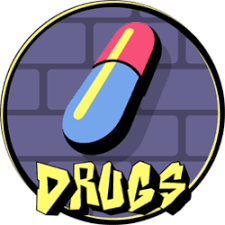

# 1. Introduction

### Company Introduction
client for this project is a pharmaceutical company.

They have a long history of making effective drugs and are the leading producer of antibiotics for bacterial infection.
Their research and development team have recently developed five types of drugs to fight against chronic throat infection.
They want to quickly release the drug in the market so that they could cure people and increase revenue for the company.
Their R&D team made a brief analysis of the chemical composition present in the drug and made a brief report stating that each drug has a different effect according to their health.
The drug which has a higher concentration of chemicals should be given to those groups of people whose health report passes some criteria as suggested by the R&D team.

# 2.Problem Statement


## The current process suffers from the following problems:

Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects.
Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team.
This process is time-consuming and wastage of resources.

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

# 3.Import Libraries

In [77]:
import pandas as pd 
import numpy as np 
import seaborn as sns                                               # Importin seaborm library for interactive visualization
import matplotlib.pyplot as plt                                    # Importing pyplot interface using matplotlib
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

# Load and Audit the Data

In [3]:
data_train = pd.read_csv("C:/DS/Term Projects/New folder/drug_train.csv")
data_test = pd.read_csv("C:/DS/Term Projects/New folder/drug_test.csv")

In [4]:
data_train.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [6]:
data_test.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K
0,95,36,M,LOW,NORMAL,11.424
1,15,16,F,HIGH,NORMAL,15.516
2,30,18,F,NORMAL,NORMAL,8.750
3,158,59,F,LOW,HIGH,10.444
4,128,47,M,LOW,NORMAL,33.542


In [7]:
data_train.isnull().sum()

Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
data_train.drop_duplicates()

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY
...,...,...,...,...,...,...,...
155,106,22,M,NORMAL,HIGH,11.953,drugX
156,14,50,F,NORMAL,HIGH,12.703,drugX
157,92,29,F,HIGH,HIGH,29.450,DrugY
158,179,67,F,NORMAL,HIGH,15.891,DrugY


In [9]:
data_train.describe()

,Id,Age,Na_to_K
count,160.000000,160.000000,160.000000
mean,99.075000,45.387500,16.194988
std,59.374894,16.101481,7.254689
min,0.000000,15.000000,6.269000
25%,45.500000,32.000000,10.445250
50%,100.500000,46.000000,14.076500
75%,149.500000,58.250000,19.480750
max,199.000000,74.000000,38.247000


In [10]:
data_train.skew()

C:\Users\gargi\AppData\Local\Temp\ipykernel_22536\3869386678.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_train.skew()


Id         0.011162
Age       -0.008815
Na_to_K    1.065324
dtype: float64

In [96]:
data_train.corr()

,Id,Age,Na_to_K,Drug
Id,1.000000,0.025323,-0.023321,0.011588
Age,0.025323,1.000000,-0.042363,-0.000476
Na_to_K,-0.023321,-0.042363,1.000000,-0.674895
Drug,0.011588,-0.000476,-0.674895,1.000000


<AxesSubplot:xlabel='Drug', ylabel='count'>

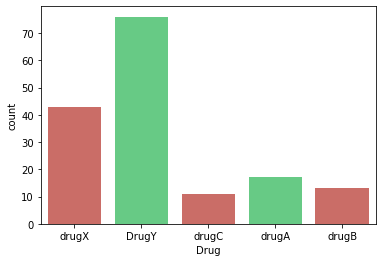

In [11]:
sns.countplot(x = 'Drug', data = data_train, palette = ['#DB5E56','#56DB7F'])

In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [13]:
data_train.nunique()

Id             160
Age             53
Sex              2
BP               3
Cholesterol      2
Na_to_K        159
Drug             5
dtype: int64

###    Change Cat column Drug to Numerical

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_train['Drug'] = le.fit_transform(data_train['Drug'])

In [15]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    int32  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 8.2+ KB


In [16]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [17]:
x = data_train.iloc[:,1:6]
y = data_train['Drug']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

In [19]:
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
152,57,M,LOW,NORMAL,19.128
117,52,M,LOW,NORMAL,32.922
5,56,F,LOW,HIGH,11.567
16,49,M,HIGH,NORMAL,6.269
45,59,M,HIGH,HIGH,13.935


In [20]:
y_train.head()

152    0
117    0
5      3
16     1
45     2
Name: Drug, dtype: int32

In [21]:
#categorial colums 
x_train_cat = x_train.select_dtypes(include =["object"])
x_test_cat = x_test.select_dtypes(include=["object"])

In [22]:
# numeric Columns 
x_train_con = x_train.select_dtypes(exclude =["object"])
x_test_con = x_test.select_dtypes(exclude=["object"])

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', sparse = False)
enc.fit(x_train_cat)
enc.categories_

[array(['F', 'M'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object)]

In [24]:
X_train_OHE = pd.DataFrame(enc.transform(x_train_cat), columns = enc.get_feature_names_out(x_train_cat.columns), index = x_train_cat.index)
X_test_OHE = pd.DataFrame(enc.transform(x_test_cat), columns = enc.get_feature_names_out(x_train_cat.columns), index = x_test_cat.index)


In [25]:
X_train_OHE

,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
152,1.0,1.0,0.0,1.0
117,1.0,1.0,0.0,1.0
5,0.0,1.0,0.0,0.0
16,1.0,0.0,0.0,1.0
45,1.0,0.0,0.0,0.0
...,...,...,...,...
17,1.0,0.0,0.0,1.0
98,0.0,0.0,0.0,1.0
66,0.0,1.0,0.0,0.0
126,1.0,1.0,0.0,0.0


In [26]:
X_train_comb = pd.concat([X_train_OHE,x_train_con], axis=1)
X_test_comb = pd.concat([X_test_OHE,x_test_con], axis=1)

In [27]:
X_train_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 152 to 109
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex_M               112 non-null    float64
 1   BP_LOW              112 non-null    float64
 2   BP_NORMAL           112 non-null    float64
 3   Cholesterol_NORMAL  112 non-null    float64
 4   Age                 112 non-null    int64  
 5   Na_to_K             112 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 6.1 KB


# Modeling with Decision Tree 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
dtree = DecisionTreeClassifier(criterion = 'gini') 
dtree.fit(X_train_comb,y_train)
peds_dt_train = dtree.predict(X_train_comb)
peds_dt_test = dtree.predict(X_test_comb)

In [30]:
peds_dt_train

array([0, 0, 3, 1, 2, 0, 4, 4, 0, 4, 3, 2, 4, 1, 0, 4, 0, 0, 4, 4, 0, 4,
       2, 0, 0, 0, 4, 0, 4, 0, 1, 0, 3, 2, 0, 4, 3, 4, 0, 0, 0, 0, 1, 1,
       4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 2, 4, 4, 0, 0, 0,
       4, 0, 0, 3, 2, 2, 1, 0, 4, 1, 0, 4, 0, 1, 0, 4, 0, 4, 4, 4, 0, 4,
       0, 4, 0, 1, 4, 0, 0, 0, 4, 4, 4, 1, 0, 0, 4, 0, 0, 3, 1, 0, 0, 3,
       0, 1])

In [31]:
def model_evaluation(actual, predicted):
    
    acc_score = accuracy_score(actual,predicted)
    cm_matrix = confusion_matrix(actual, predicted)
    clas_rep = classification_report(actual, predicted)
    
    print("Accuracy Score : ", round(acc_score,2))
    print("Confusion Matrix : ")
    print(cm_matrix)
    
    print(clas_rep)     

In [32]:
model_evaluation(y_train,peds_dt_train)

Accuracy Score :  1.0
Confusion Matrix : 
[[54  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        32

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [33]:
model_evaluation(y_test, peds_dt_test)

Accuracy Score :  0.98
Confusion Matrix : 
[[22  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  5  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.83      1.00      0.91         5
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.97      0.97      0.96        48
weighted avg       0.98      0.98      0.98        48



In [34]:
peds_dt_test

array([4, 2, 0, 0, 4, 0, 1, 4, 0, 0, 1, 0, 2, 3, 1, 3, 0, 0, 0, 1, 0, 4,
       1, 0, 0, 2, 4, 0, 0, 4, 4, 3, 0, 0, 3, 0, 0, 0, 0, 4, 2, 4, 4, 4,
       1, 2, 0, 0])

In [35]:
data_test1 = data_test.copy()

In [36]:
data_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           40 non-null     int64  
 1   Age          40 non-null     int64  
 2   Sex          40 non-null     object 
 3   BP           40 non-null     object 
 4   Cholesterol  40 non-null     object 
 5   Na_to_K      40 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ KB


In [37]:
data_test1 = data_test1.drop(['Id'], axis = 1)

In [38]:
test_cat = data_test1.select_dtypes(include=['object'])
test_cont = data_test1.select_dtypes(exclude=['object'])

In [39]:
test_OHE = pd.DataFrame(enc.transform(test_cat), columns = enc.get_feature_names_out(test_cat.columns), index = test_cat.index)

In [40]:
test_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      40 non-null     int64  
 1   Na_to_K  40 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


In [41]:
test_comb = pd.concat([test_OHE,test_cont], axis=1)

In [42]:
pred_drug = dtree.predict(test_comb)
df = pd.DataFrame(data = pred_drug)
df.columns = ['Drug']


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Drug    40 non-null     int32
dtypes: int32(1)
memory usage: 288.0 bytes


In [44]:
submission_df = pd.DataFrame(data = data_test, columns = ["Id"])


In [45]:
submission_df["Drug"] = df["Drug"]


In [46]:
submission_df.head()


,Id,Drug
0,95,4
1,15,0
2,30,4
3,158,3
4,128,0


# Modeling with Random Forest 

In [47]:
from sklearn.ensemble import RandomForestClassifier


In [62]:
rf = RandomForestClassifier(verbose = 1, random_state = 123) 
rf.fit(X_train_comb,y_train)
peds_rf_train = rf.predict(X_train_comb)
peds_rf_test = rf.predict(X_test_comb)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


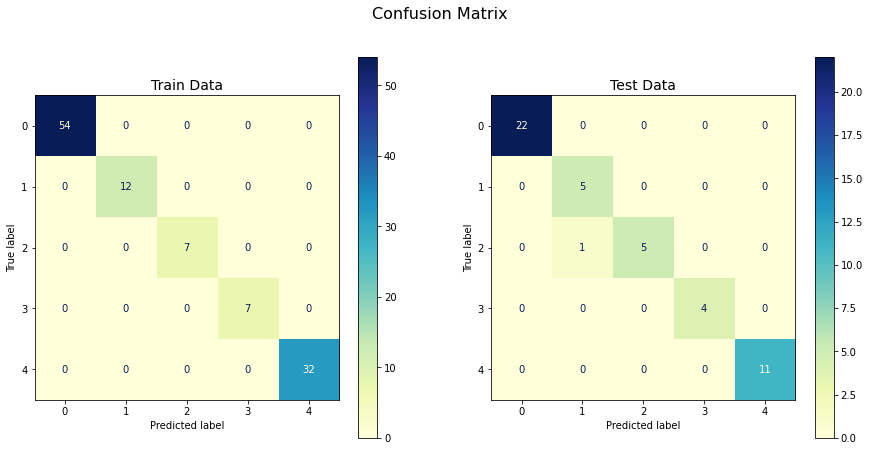

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=rf, X=X_train_comb, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=rf, X=X_test_comb, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [49]:
model_evaluation(y_train, peds_rf_train)

Accuracy Score :  1.0
Confusion Matrix : 
[[54  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        32

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [50]:
model_evaluation(y_test, peds_rf_test)

Accuracy Score :  0.98
Confusion Matrix : 
[[22  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  5  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.83      1.00      0.91         5
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.97      0.97      0.96        48
weighted avg       0.98      0.98      0.98        48



In [85]:
param_dist = {"max_depth": range(2,5),
              "min_samples_split" : range(2,15),
              "n_estimators": [100, 200, 300],
              "criterion":['gini', 'entropy']}

In [86]:
random_search = RandomizedSearchCV(estimator = rf, 
                                   param_distributions=param_dist,
                                   n_iter=50)

In [87]:
random_search.fit(X_train_comb,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=123,
                                                    verbose=1),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 5),
                                        'min_samples_split': range(2, 15),
                                        'n_estimators': [100, 200, 300]})

In [88]:
peds_rcv_train = random_search.predict(X_train_comb)
peds_rcv_test = random_search.predict(X_test_comb)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [89]:
model_evaluation(y_train, peds_rcv_train)

Accuracy Score :  1.0
Confusion Matrix : 
[[54  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        32

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [90]:
model_evaluation(y_test, peds_rcv_test)

Accuracy Score :  0.98
Confusion Matrix : 
[[22  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  5  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.83      1.00      0.91         5
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.97      0.97      0.96        48
weighted avg       0.98      0.98      0.98        48



In [ ]:
pred_drug = dtree.predict(test_comb)
df = pd.DataFrame(data = pred_drug)
df.columns = ['Drug']
